### ECE-GY 6123
### Nikita Makarov, Fall 2024

### Homework 1

Problem 1a:

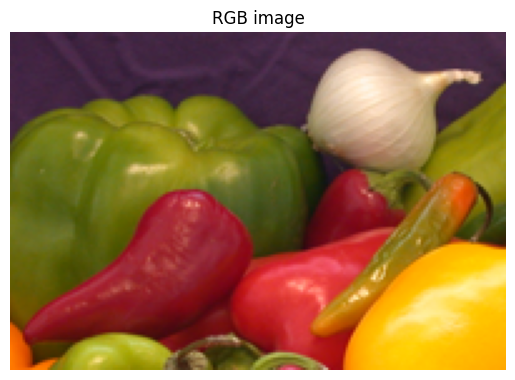

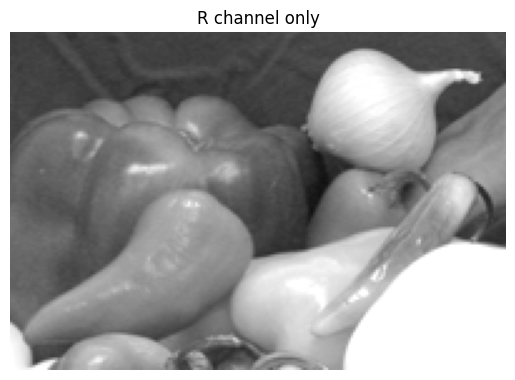

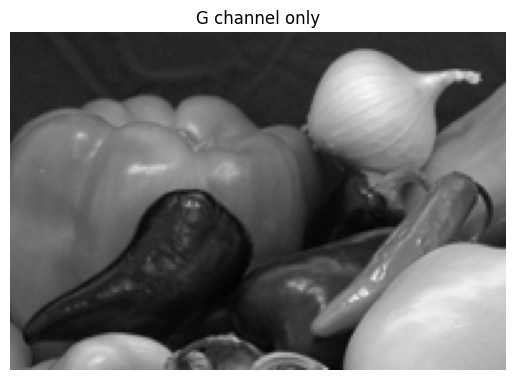

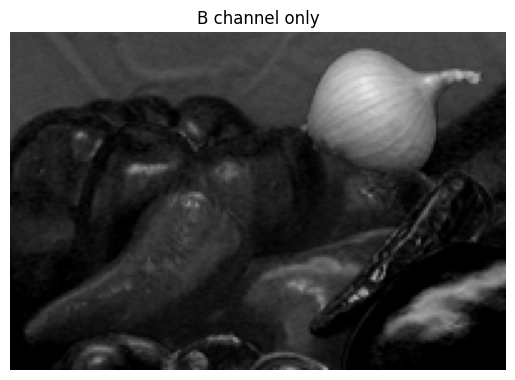

In [2]:
from PIL import Image
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

# Load color image
img = Image.open('onion.png')
img.load()
RGB_data = np.asarray(img) # This image has 24 bit depth (8x3)

# Create image for RGB
plt.figure()
plt.imshow(RGB_data)
plt.axis('off')
plt.title('RGB image')

# Create image for R channel
R_data = RGB_data[:,:,0]
plt.figure()
plt.imshow(R_data, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title('R channel only')

# Create image for G channel
G_data = RGB_data[:,:,1]
plt.figure()
plt.imshow(G_data, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title('G channel only')

# Create image for B channel
B_data = RGB_data[:,:,2]
plt.figure()
plt.imshow(B_data, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title('B channel only')

# Display all images
plt.show()

This image contains vegetables on a purple background. Most of the vegetables are either red, green, and yellow, with one onion which is white. The red, yellow, and white vegetables are the brightest in the red channel image, and the green, yellow, and white vegetables are the brightest in the green channel image. In the blue channel image, the only bright vegetable is the white onion. The white onion is made up of all three channels, so it shows up as bright in all three. None of the other vegetables are shades of blue, so that image is the darkest overall. Yellow appears to be a combination of red and green, so that vegetable is bright in both of those channels.

Problem 1b:

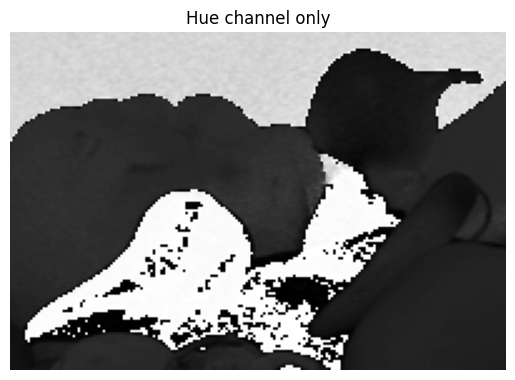

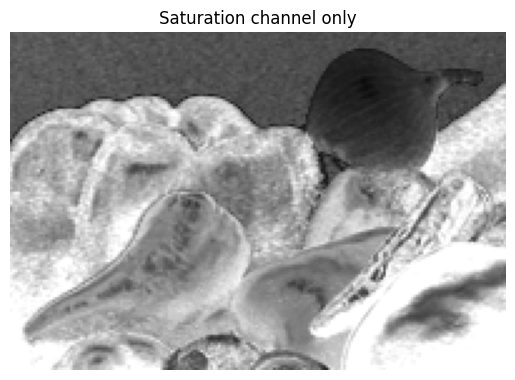

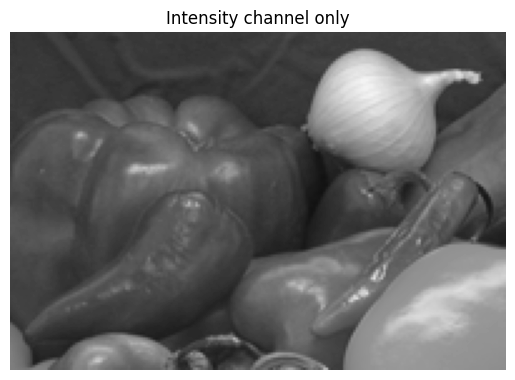

In [15]:
# Normalize RGB arrays
R = R_data/255
G = G_data/255
B = B_data/255

# Create hue (H) data array and create image
theta = np.arccos((1/2*((R-G)+(R-B)))/np.sqrt((R-G)*(R-G)+(R-B)*(G-B))) * 180/np.pi # Calculate theta in degrees
H = np.zeros_like(theta) # Init hue array
TF = B <= G
H[TF] = theta[TF] # First part of hue array
H[~TF] = 360-theta[~TF] # Second part of the hue array
plt.figure()
plt.imshow(H, cmap='gray', vmin=0, vmax=360)
plt.axis('off')
plt.title('Hue channel only')

# Create saturation (S) data array and create image
S = 1 - (3 * np.min([R,G,B],axis=0))/(R+G+B)
plt.figure()
plt.imshow(S, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title('Saturation channel only')

# Create intensity (I) data array and create image
I = (R+G+B)/3
plt.figure()
plt.imshow(I, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title('Intensity channel only')

# Display all images
plt.show()

Since hue is a representation of the dominant color for each pixel, it is not so easily represented in gray scale. The degree value from 0 to 360 degrees is the angle from the center of the color wheel to the dominant color of the pixel. We can see from the bright parts of the image that the red and blue pixels of the image are close to each other in hue, while the dark parts of the image show that the green and yellow pixels are close to each other in hue.

Saturation is a measure of the purity of the dominant three colors, RGB. The red, green, and yellow parts of the image are very pure and thus very bright. The dark background and the white onion are less pure, so they are darker.

Intensity is the brightness, which is closely related to representing the original image in gray scale. The bright white and yellow areas of the image are brightest, while the other areas are darker.

Problem 1c